In [2]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
<li> <b> What do you think about the error/accuracy:</b>
</ul>

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [3]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]

dist_polls


,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,6,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,7,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [4]:
dff=dist_polls.drop(["district"],axis=1)
dff


,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


In [5]:
# vote share of purple party in all nine polls in  district 1
df1=dff.iloc[0]
print("Purple pary vote share in 9 polls in district 1:",df1.mean())



Purple pary vote share in 9 polls in district 1: 0.54


In [6]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [7]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [8]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [9]:
df5=dff.iloc[4]
print("Purple pary vote share in 9 polls in district 5  :",round(df5.mean(),2))

Purple pary vote share in 9 polls in district 5  : 0.45


In [10]:
df6=dff.iloc[5]
print("Purple pary vote share in 9 polls in district 6  :",round(df6.mean(),2))

Purple pary vote share in 9 polls in district 6  : 0.47


In [11]:
df7=dff.iloc[6]
print("Purple pary vote share in 9 polls in district 7 :",round(df7.mean(),2))

Purple pary vote share in 9 polls in district 7 : 0.53


##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. 

In [12]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.head(9)

,voter_turn_percentage,Yellow_improvement,year
0,0.53,0.012,2013
1,0.51,0.023,2014
2,0.48,-0.017,2015
3,0.55,0.031,2016
4,0.54,0.030,2017
5,0.59,-0.004,2018
6,0.49,-0.030,2019
7,0.57,0.042,2020
8,0.56,0.029,2021


## Start Your Work

### Part 1 - Election

Calculation of Percentage share in each district in done above:

In [13]:
# Do some stuff

In [14]:
#c_obj=thinkstats2.Cdf(dist_polls)
#thinkplot.cdf(c_obj)

<AxesSubplot:xlabel='Poll_1', ylabel='Count'>

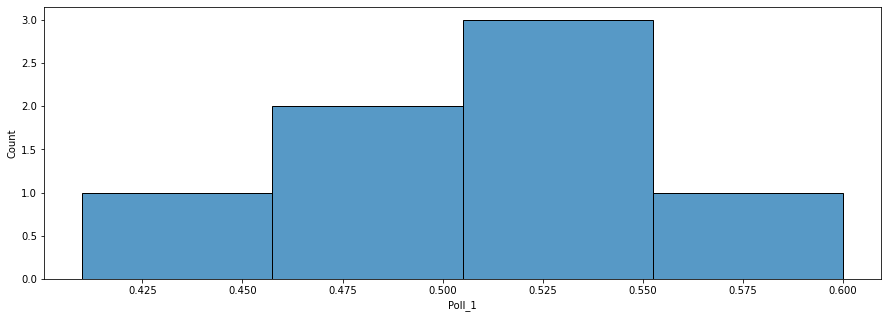

In [15]:

sns.histplot(data=dist_polls, x="Poll_1")

                                DISTRICT-1

In [16]:
df1=dff.iloc[0]
print("Purple pary vote share in all 9 polls in district 1:",df1.mean())

Purple pary vote share in all 9 polls in district 1: 0.54


In [17]:
#How likely is it for someone to vote purple and yellow?
probp = .54
print("Purple Prob:", probp)

proby = .46
print("Yellow Prob :", proby)

Purple Prob: 0.54
Yellow Prob : 0.46


In [18]:
def oneVote(probCalc):
    vote = np.random.binomial(n=1, p=probCalc)
    return vote

In [19]:
oneVote(probp)

1

In [20]:
#Get an arbitrary number of simulated votes
def getSample(voteProb, n=1000):
    vote_list = []
    for i in range(n):
        vote_list.append(oneVote(voteProb))
    return vote_list

In [21]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp = getSample(probp, 5000)
np.mean(tmp)

0.5348

In [22]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci

In [23]:
getSamples(probp, 1000, 5)

([0.551, 0.547, 0.53, 0.508, 0.561],
 0.018627936010197174,
 Cdf([0.508 0.53  0.547 0.551 0.561], [0.2 0.4 0.6 0.8 1. ]),
 (0.508, 0.561))

Error: 0.13733171520082316
Error: 0.0531224999411737
Error: 0.013490366933482571
Error: 0.005210969199678699
Error: 0.0015925099685716174


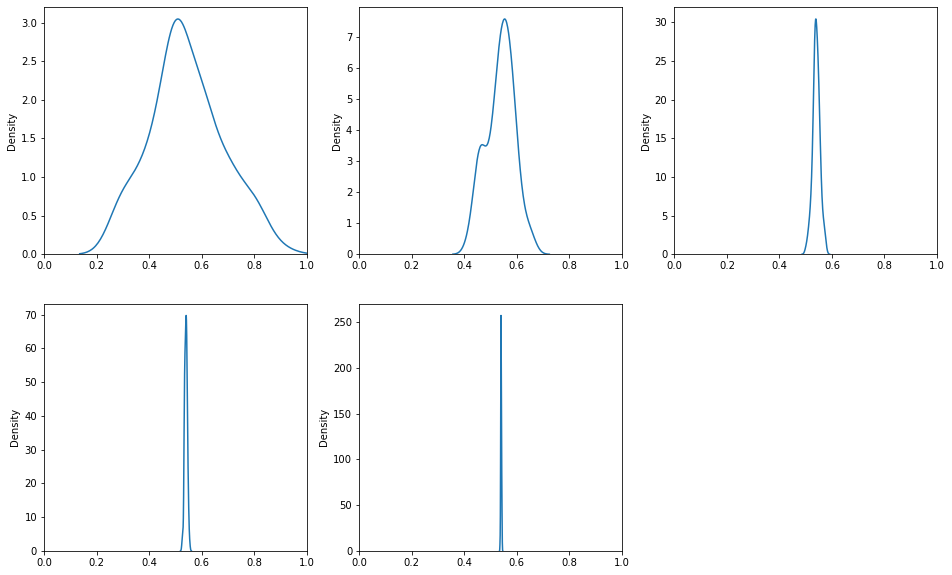

In [24]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err)
thinkplot.Config()


Error: 0.17035257556021863
Error: 0.04743416490252569
Error: 0.015328078809818273
Error: 0.004972051890316506
Error: 0.0013784850380036706


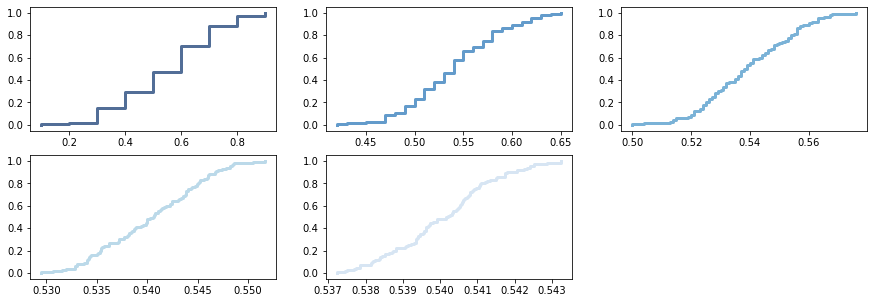

In [25]:
#And the CDFs
from matplotlib.pyplot import xlim


for i in range(countHist):
    tmpH, err, cdf, ci = getSamples(probp, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err)
thinkplot.Config()

0.985


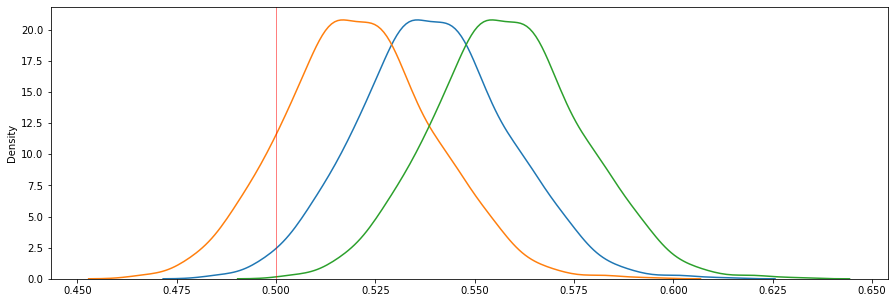

In [26]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means, err, cdfFin, ciFin = getSamples(probp, n=700, samples=trials)
lowest = means - err
highest = means + err
bWins = 0 
for i in range(len(means)):
    if means[i] > .5000:
        bWins = bWins + 1
print(bWins/trials)

sns.kdeplot(means)
sns.kdeplot(lowest)
sns.kdeplot(highest)
thinkplot.axvline(.5, color="red")

Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple = 54%.

Fraction of Scenarios where purple wins is 98.5% 
We are 95 percent confident that purple will get between 50.4% and 57.6% percent of the vote


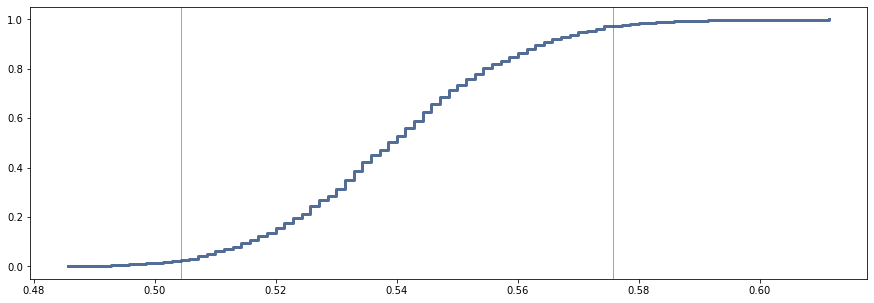

In [27]:
thinkplot.Cdf(cdfFin)
thinkplot.axvline(ciFin[0], color="red")
thinkplot.axvline(ciFin[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin[0]*100, ciFin[1]*100))

Prediction-  District1-Winner-Purple Party

                                DISTRICT-2

In [28]:
df2=dff.iloc[1]
print("Purple pary vote share in 9 polls in district 2  :",round(df2.mean(),2))

Purple pary vote share in 9 polls in district 2  : 0.48


In [29]:
#How likely is it for someone to vote purple and yellow?
probp2 = .48
print("Purple Prob:", probp2)

proby2 = .52
print("Yellow Prob :", proby2)

Purple Prob: 0.48
Yellow Prob : 0.52


In [30]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp3 = getSample(probp2, 5000)
np.mean(tmp3)

0.4898

In [31]:
getSamples(probp2, 1000, 5)

([0.499, 0.47, 0.488, 0.477, 0.472],
 0.010936178491593862,
 Cdf([0.47  0.472 0.477 0.488 0.499], [0.2 0.4 0.6 0.8 1. ]),
 (0.47, 0.499))

Error: 0.16528762809115508
Error: 0.058523499553598125
Error: 0.01584708175027819
Error: 0.0054789050000889775
Error: 0.0018367324247151487


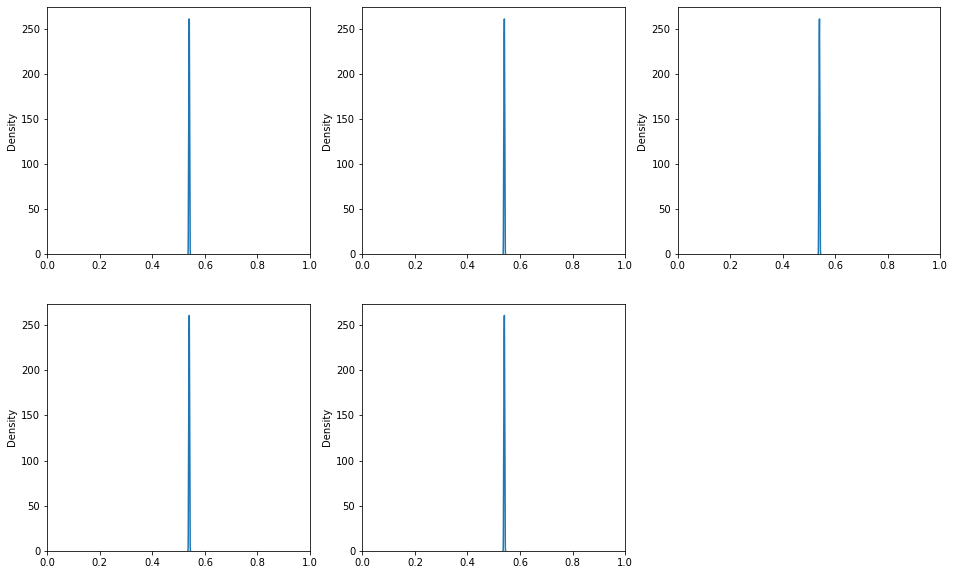

In [32]:
#Print a grid of differnet n values

countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH).set(xlim=(0,1))
    print("Error:", err2)
thinkplot.Config()


Error: 0.16425589791541734
Error: 0.055470712993434666
Error: 0.015157176518072217
Error: 0.004475522315886716
Error: 0.0014336118721606647


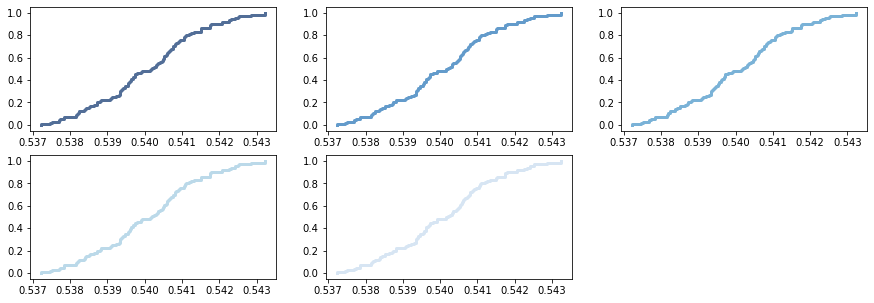

In [33]:
for i in range(countHist):
    tmpH2, err2, cdf2, ci2 = getSamples(probp2, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf)
    print("Error:", err2)
thinkplot.Config()


0.132


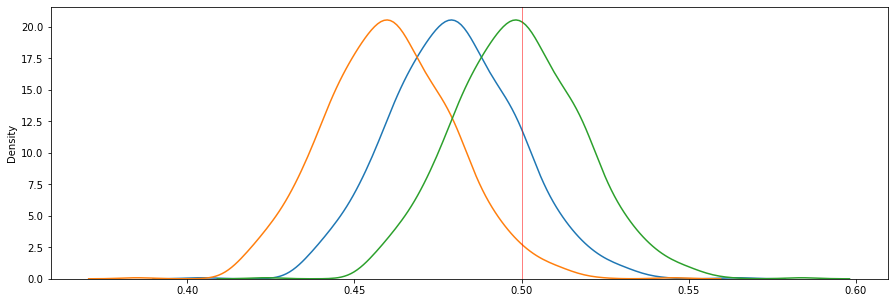

In [34]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means2, err2, cdfFin2, ciFin2 = getSamples(probp2, n=700, samples=trials)
lowest2 = means2 - err2
highest2 = means2 + err2
bWins2 = 0 
for i in range(len(means2)):
    if means2[i] > .5000:
        bWins2 = bWins2 + 1
print(bWins2/trials)

sns.kdeplot(means2)
sns.kdeplot(lowest2)
sns.kdeplot(highest2)
thinkplot.axvline(.5, color="red")


Predicting the winner is with all 9 polls combined in District 2

Fraction of Scenarios where purple wins is 13.2% 
We are 95 percent confident that purple will get between 44.3% and 51.9% percent of the vote


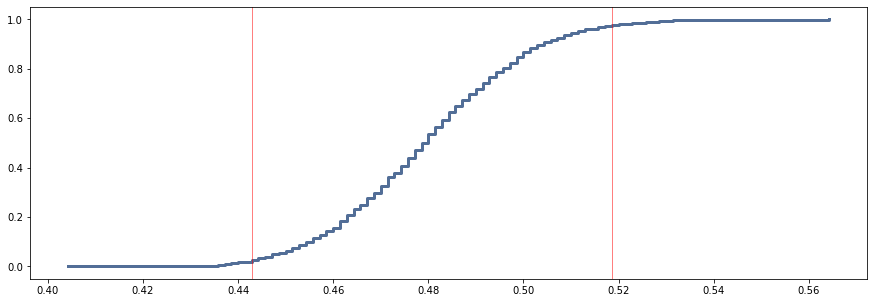

In [35]:
thinkplot.Cdf(cdfFin2)
thinkplot.axvline(ciFin2[0], color="red")
thinkplot.axvline(ciFin2[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin2.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin2[0]*100, ciFin2[1]*100))


Prediction- Purple party is loosing in District 2  
            Yellow party is winner is district 2    

                            DISTRICT-3

In [36]:
df3=dff.iloc[2]
print("Purple pary vote share in 9 polls in district 3  :",df3.mean())

Purple pary vote share in 9 polls in district 3  : 0.51


In [37]:
#How likely is it for someone to vote purple and yellow?
probp3 = .51
print("Purple Prob:", probp3)

proby3 = .49
print("Yellow Prob :", proby3)


Purple Prob: 0.51
Yellow Prob : 0.49


In [38]:
#proability of 1 vote going to purple party
oneVote(probp3)

1

In [39]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp2 = getSample(probp3, 6500)
np.mean(tmp2)


0.5101538461538462

In [40]:
def getSamples(voteProb, n=1000, samples=100, ciLow=2.5, ciHi=97.5):
    meanList = []
    for i in range(samples):
        meanList.append(np.mean(getSample(voteProb, n)))
    muList = [voteProb] * samples
    cdf = thinkstats2.Cdf(meanList) #Make a CDF of the means of the analytical dist's
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi) #5th, 95th percentiles. 
    stderr = mean_squared_error(meanList, muList, squared=False)
    return meanList, stderr, cdf, ci


In [41]:
getSamples(probp3, 1100, 5)

([0.5081818181818182,
  0.49727272727272726,
  0.5263636363636364,
  0.5163636363636364,
  0.5172727272727272],
 0.010261055316016331,
 Cdf([0.49727273 0.50818182 0.51636364 0.51727273 0.52636364], [0.2 0.4 0.6 0.8 1. ]),
 (0.49727272727272726, 0.5263636363636364))

Sample Size Check

Error: 0.15838388347762705
Error: 0.05142602807563854
Error: 0.016222066901152115
Error: 0.0050522992065719224


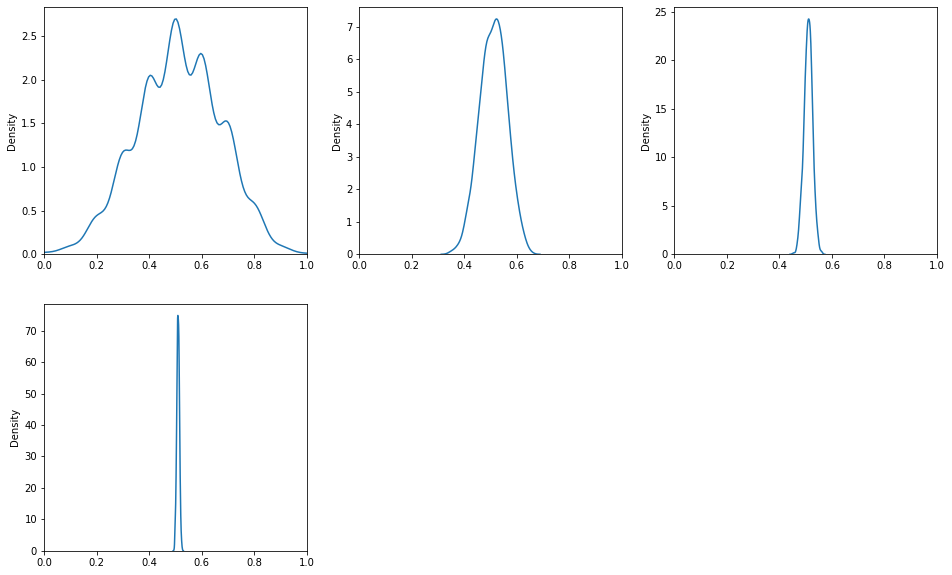

In [42]:
#Print a grid of differnet n values

countHist = 4
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 1100

for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH3).set(xlim=(0,1))
    print("Error:", err3)
thinkplot.Config()


All of these graphs have a fixed x-axis, the "tigher" the projections (probability of a purple party win) are, the more confident we are in that prediction. Or, the more likely "that thing" is to happen, and the less likely some "far away thing" is to happen. 

Error: 0.1582920201285069
Error: 0.04928949731387556
Error: 0.01570764145249058
Error: 0.005152362211999109


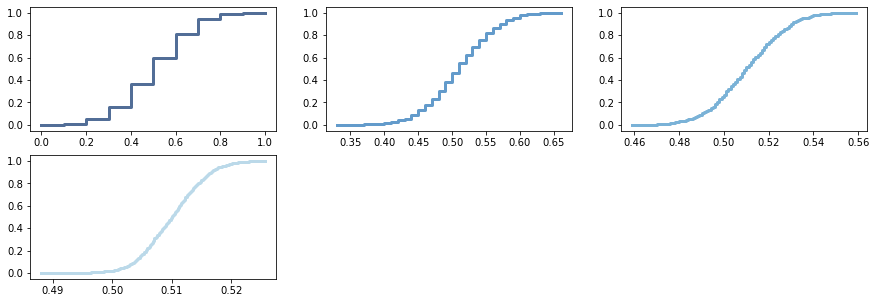

In [43]:
#plotting CDF's:
for i in range(countHist):
    tmpH3, err3, cdf3, ci3 = getSamples(probp3, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf3)
    print("Error:", err3)
thinkplot.Config()


Above are multiple executions, with multiple n values. What we should see is that as we get larger and larger n values - the number of 'surveys' taken, we should get closer and closer to a normal curve centered around the expected percentage of votes for purple party = 51.4%. 

0.6881818181818182


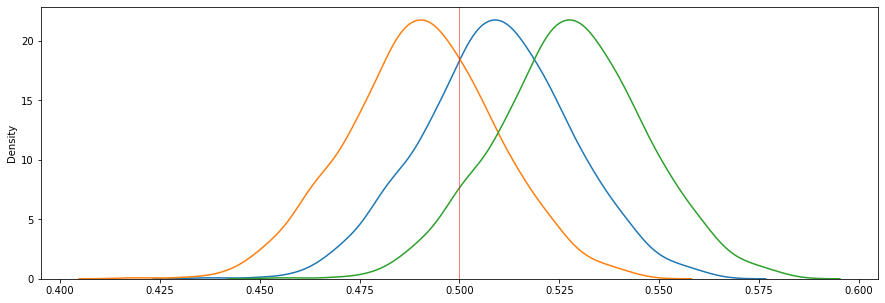

In [44]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1100
means3, err3, cdfFin3, ciFin3 = getSamples(probp3, n=700, samples=trials)
lowest3 = means3 - err3
highest3 = means3 + err3
bWins3 = 0 
for i in range(len(means3)):
    if means3[i] > .5000:
        bWins3 = bWins3 + 1
print(bWins3/trials)

sns.kdeplot(means3)
sns.kdeplot(lowest3)
sns.kdeplot(highest3)
thinkplot.axvline(.5, color="red")


Predict The winner in all 9 polls in for District 2

Fraction of Scenarios where purple wins is 68.8% 
We are 95 percent confident that purple will get between 47.3% and 54.4% percent of the vote


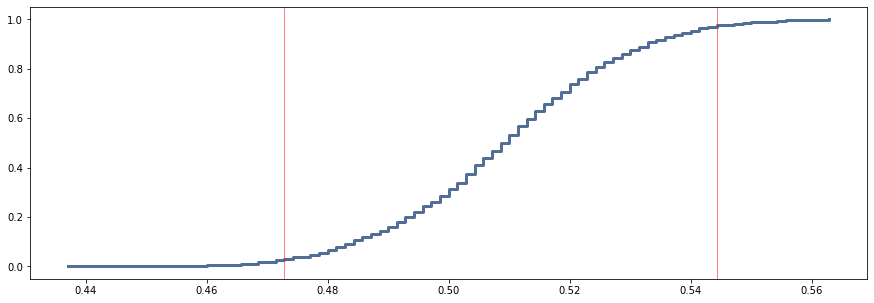

In [45]:
thinkplot.Cdf(cdfFin3)
thinkplot.axvline(ciFin3[0], color="red")
thinkplot.axvline(ciFin3[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin3.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin3[0]*100, ciFin3[1]*100))


Prediction-  District 3 -Winner-Purple Party

                                    DISTRICT-4

In [46]:
df4=dff.iloc[3]
print("Purple pary vote share in 9 polls in district 4  :",round(df4.mean(),2))

Purple pary vote share in 9 polls in district 4  : 0.6


In [47]:
#How likely is it for someone to vote purple and yellow?
probp4 = .60
print("Purple Prob:", probp4)

proby4 = .40
print("Yellow Prob :", proby4)


Purple Prob: 0.6
Yellow Prob : 0.4


In [48]:
oneVote(probp4)

1

In [49]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp4 = getSample(probp4, 1000)
np.mean(tmp4)


0.591

In [50]:
getSamples(probp4, 1000, 5)

([0.581, 0.593, 0.613, 0.612, 0.595],
 0.012231107881136535,
 Cdf([0.581 0.593 0.595 0.612 0.613], [0.2 0.4 0.6 0.8 1. ]),
 (0.581, 0.613))

Error: 0.16031219541881395
Error: 0.04836320915737499
Error: 0.01573753474976308
Error: 0.004807962146273615
Error: 0.001550682752854367


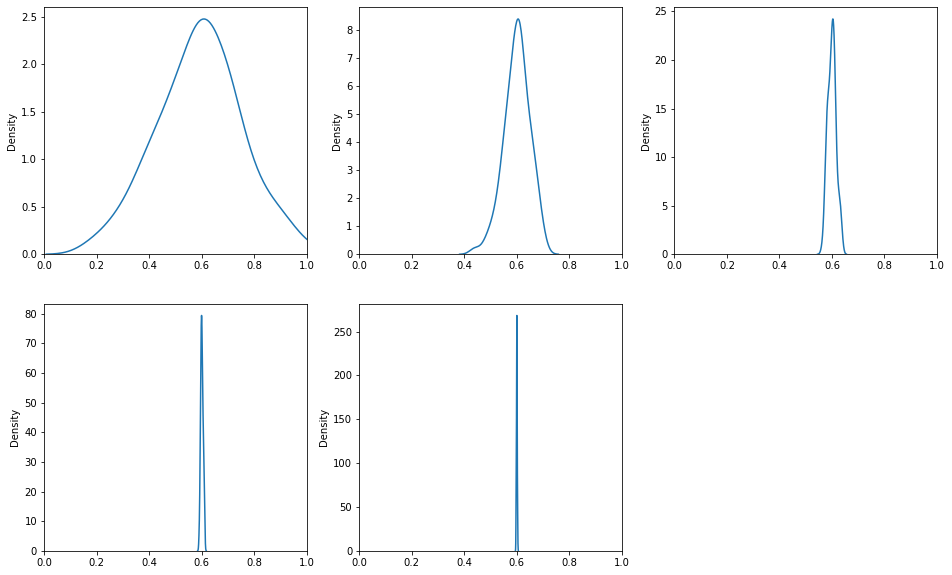

In [51]:
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH4).set(xlim=(0,1))
    print("Error:", err4)
thinkplot.Config()


Error: 0.018746101635556452
Error: 0.018746101635556452
Error: 0.018746101635556452
Error: 0.018746101635556452
Error: 0.018746101635556452


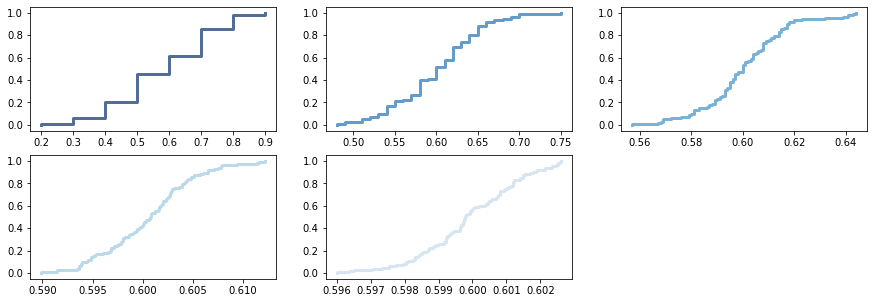

In [52]:
for i in range(countHist):
    tmpH4, err4, cdf4, ci4 = getSamples(probp4, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf4)
    print("Error:", err)
thinkplot.Config()


1.0


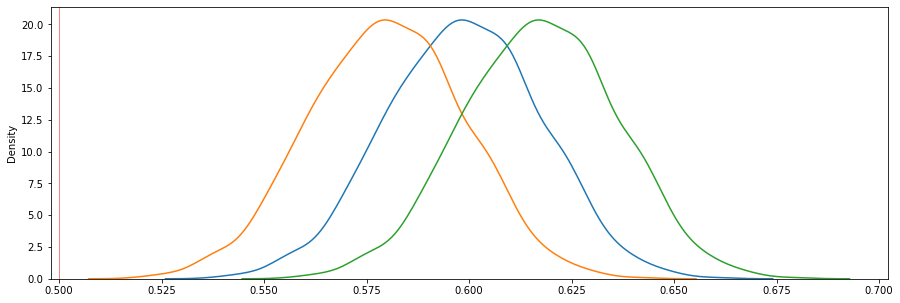

In [53]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means4, err4, cdfFin4, ciFin4 = getSamples(probp4, n=700, samples=trials)
lowest4 = means4 - err4
highest4 = means4 + err4
bWins4 = 0 
for i in range(len(means4)):
    if means4[i] > .5000:
        bWins4 = bWins4 + 1
print(bWins4/trials)

sns.kdeplot(means4)
sns.kdeplot(lowest4)
sns.kdeplot(highest4)
thinkplot.axvline(.5, color="red")


Fraction of Scenarios where purple wins is 100.0% 
We are 95 percent confident that purple will get between 56.0% and 63.4% percent of the vote


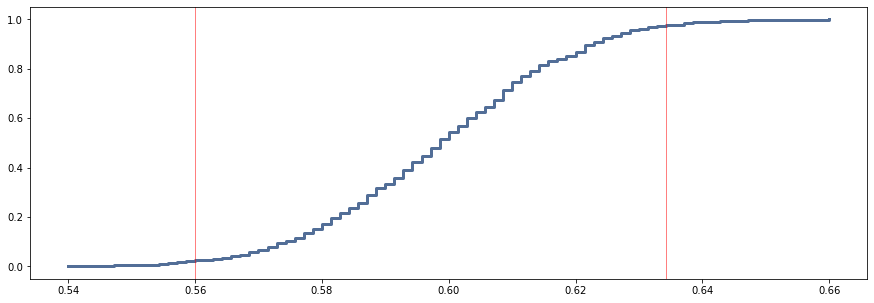

In [54]:
thinkplot.Cdf(cdfFin4)
thinkplot.axvline(ciFin4[0], color="red")
thinkplot.axvline(ciFin4[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin4.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin4[0]*100, ciFin4[1]*100))


Prediction - Combining all the 9 polls in district4 - winner is purple party

                                District-5

In [55]:
df5=dff.iloc[4]
print("Purple pary vote share in 9 polls in district 5  :",round(df5.mean(),2))

Purple pary vote share in 9 polls in district 5  : 0.45


In [56]:
#How likely is it for someone to vote purple and yellow?
probp5 = .45
print("Purple Prob:", probp5)

proby5 = .55
print("Yellow Prob :", proby5)

Purple Prob: 0.45
Yellow Prob : 0.55


In [57]:
oneVote(probp5)

1

In [58]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp5 = getSample(probp5, 1000)
np.mean(tmp5)

0.432

In [59]:
getSamples(probp5, 1000, 5)

([0.443, 0.44, 0.455, 0.449, 0.455],
 0.006324555320336764,
 Cdf([0.44  0.443 0.449 0.455], [0.2 0.4 0.6 1. ]),
 (0.44, 0.455))

Error: 0.17291616465790582
Error: 0.045066617356974994
Error: 0.017741758650145142
Error: 0.005869318529437638
Error: 0.0016262072438653094


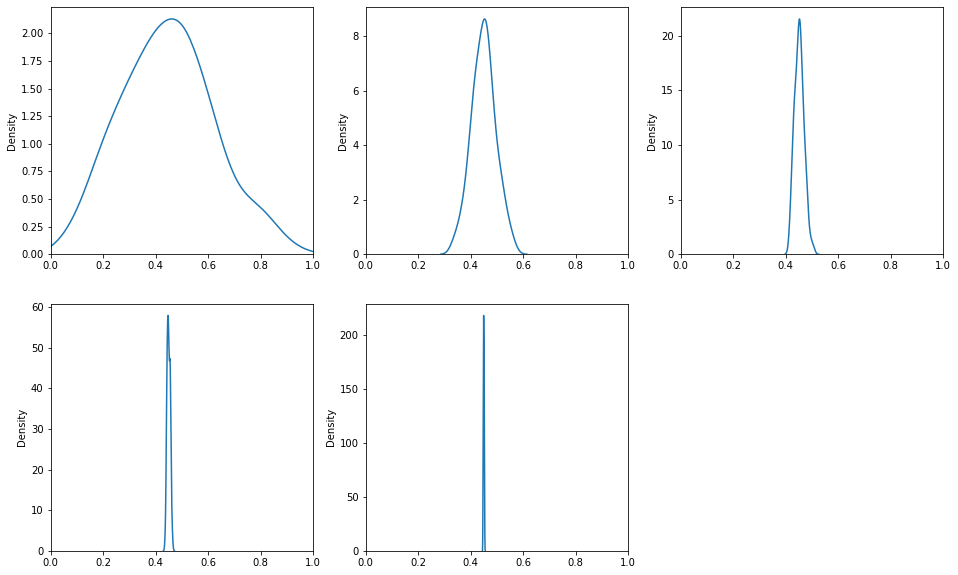

In [60]:
#plotting KDF's
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH5, err5, cdf5, ci5 = getSamples(probp5, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH5).set(xlim=(0,1))
    print("Error:", err5)
thinkplot.Config()

Error: 0.17175564037317667
Error: 0.05508175741568165
Error: 0.014838800490605703
Error: 0.005076219065406853
Error: 0.0013278196413670008


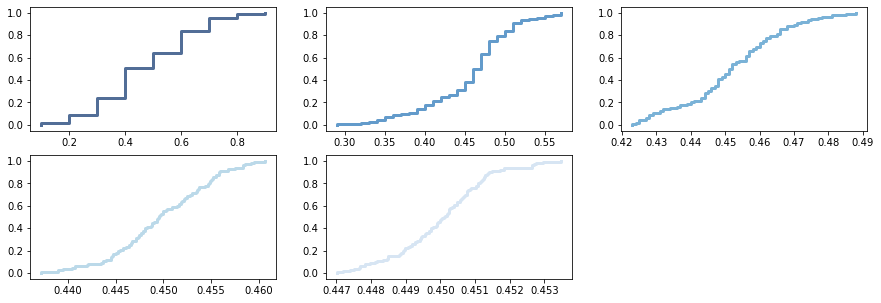

In [61]:
#plotting CDF's
for i in range(countHist):
    tmpH5, err5, cdf5, ci5 = getSamples(probp5, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf5)
    print("Error:", err5)
thinkplot.Config()

0.003


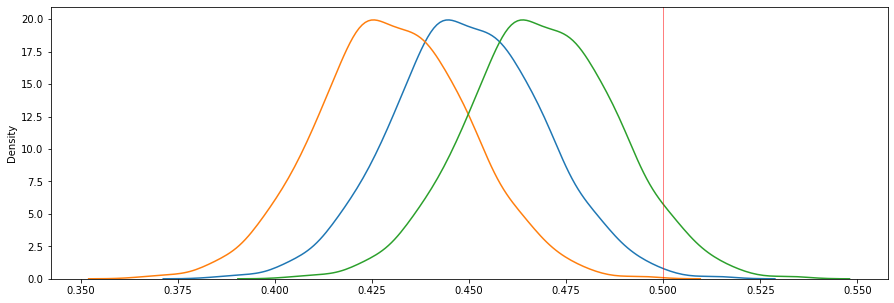

In [62]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means5, err5, cdfFin5, ciFin5 = getSamples(probp5, n=700, samples=trials)
lowest5 = means5 - err5
highest5 = means5 + err5
bWins5 = 0 
for i in range(len(means5)):
    if means5[i] > .5000:
        bWins5 = bWins5 + 1
print(bWins5/trials)

sns.kdeplot(means5)
sns.kdeplot(lowest5)
sns.kdeplot(highest5)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 0.3% 
We are 95 percent confident that purple will get between 41.3% and 48.7% percent of the vote


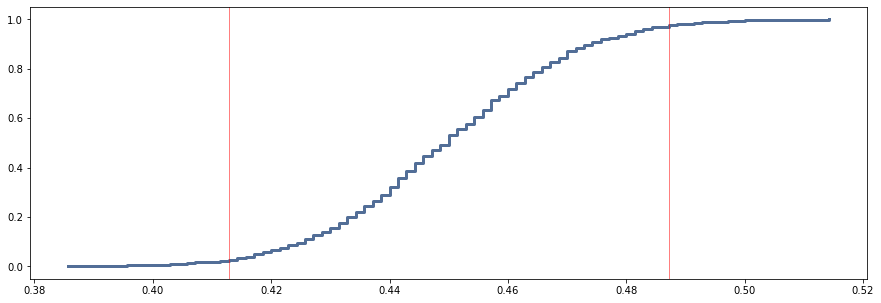

In [63]:
thinkplot.Cdf(cdfFin5)
thinkplot.axvline(ciFin5[0], color="red")
thinkplot.axvline(ciFin5[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin5.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin5[0]*100, ciFin5[1]*100))

Prediction- Combining all 9 polls in district 5 purple party looses.
            Winner is yellow party

                            District-6

In [128]:
df6=dff.iloc[5]
print("Purple pary vote share in 9 polls in district 6 :",round(df6.mean(),2))

Purple pary vote share in 9 polls in district 6 : 0.47


In [129]:
#How likely is it for someone to vote purple and yellow?
probp6 = .47
print("Purple Prob:", probp6)

proby6 = .53
print("Yellow Prob :", proby6)

Purple Prob: 0.47
Yellow Prob : 0.53


In [130]:
oneVote(probp6)

1

In [134]:
#Get a bunch of votes, print the percentage that are purple. 
#Try changing n and see what happens. 
tmp6 = getSample(probp5, 1000)
np.mean(tmp6)

0.415

In [135]:
getSamples(probp6, 1000, 5)

([0.479, 0.462, 0.476, 0.47, 0.474],
 0.0062769419305900775,
 Cdf([0.462 0.47  0.474 0.476 0.479], [0.2 0.4 0.6 0.8 1. ]),
 (0.462, 0.479))

Error: 0.1746424919657298
Error: 0.04252058325093861
Error: 0.015725775020646825
Error: 0.004870092401587473
Error: 0.00170836266641483


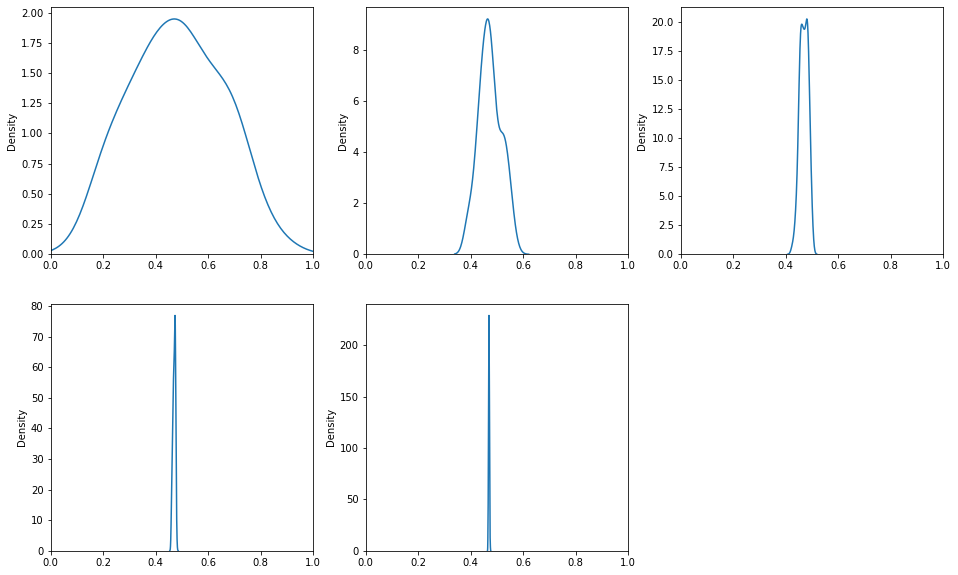

In [136]:
#plotting KDF's
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH6, err6, cdf6, ci6 = getSamples(probp6, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH6).set(xlim=(0,1))
    print("Error:", err6)
thinkplot.Config()

Error: 0.154983870128475
Error: 0.04758150901348128
Error: 0.01462942240828392
Error: 0.004887422633658762
Error: 0.0015263652904858613


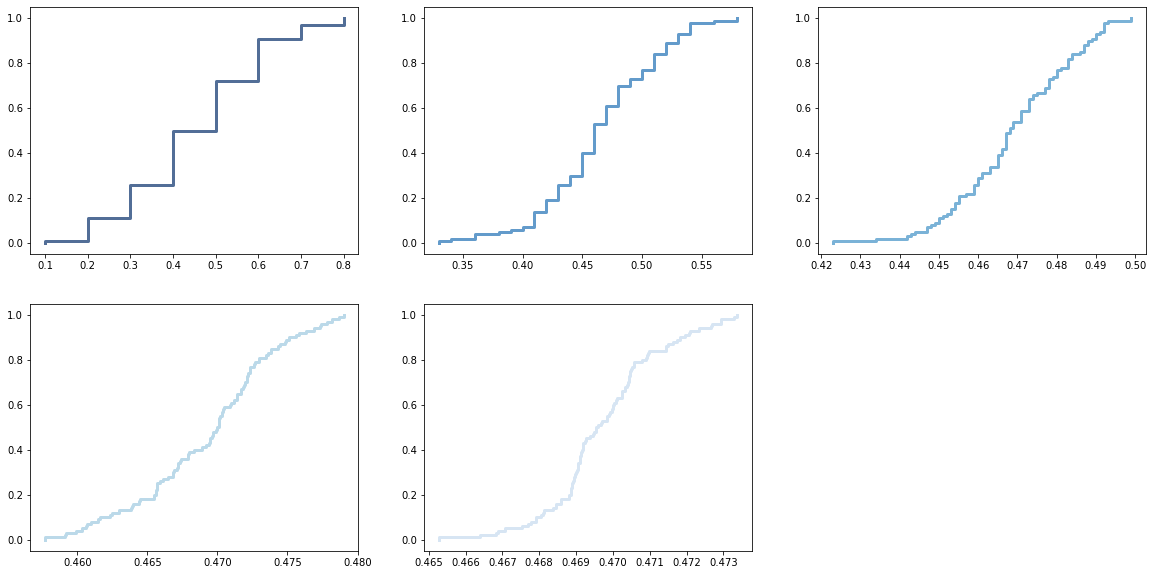

In [137]:
#plotting CDF's
for i in range(countHist):
    tmpH6, err6, cdf6, ci6= getSamples(probp6, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf6)
    print("Error:", err6)
thinkplot.Config()

1.0


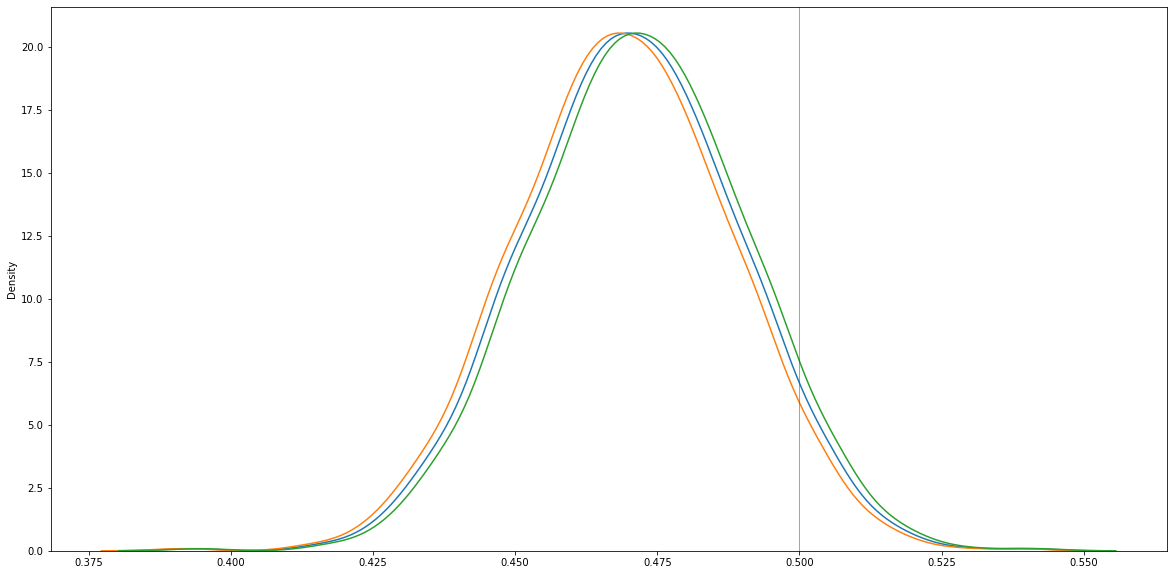

In [138]:
#Run a bunch of trials and count how many purple LOSES in. 
trials = 1000
means6, err8, cdfFin6, ciFin6 = getSamples(probp6, n=700, samples=trials)
lowest6 = means6 - err6
highest6 = means6 + err6
bWins6 = 0 
for i in range(len(means6)):
    if means4[i] > .5000:
        bWins6 = bWins6 + 1
print(bWins6/trials)

sns.kdeplot(means6)
sns.kdeplot(lowest6)
sns.kdeplot(highest6)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 5.6% 
We are 95 percent confident that purple will get between 43.4% and 50.6% percent of the vote


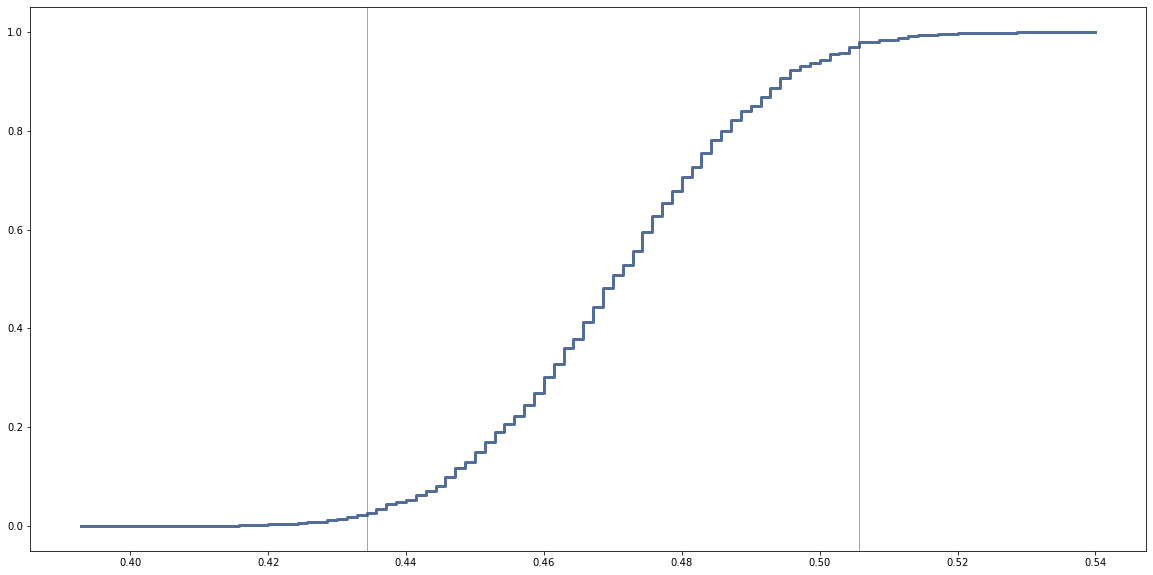

In [139]:
thinkplot.Cdf(cdfFin6)
thinkplot.axvline(ciFin6[0], color="red")
thinkplot.axvline(ciFin6[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin6.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin6[0]*100, ciFin6[1]*100))

Prediction- Combining all 9 polls in district 6 purple party looses.
            Winner is yellow party

                                    District-7

In [123]:
df7=dff.iloc[6]
print("Purple pary vote share in 9 polls in district 7 :",round(df7.mean(),2))

Purple pary vote share in 9 polls in district 7 : 0.53


In [126]:
#How likely is it for someone to vote purple and yellow?
probp7 = .53
print("Purple Prob:", probp7)

proby7 = .47
print("Yellow Prob :", proby7)

Purple Prob: 0.53
Yellow Prob : 0.47


In [140]:
getSamples(probp7, 1000, 5)

([0.52, 0.514, 0.528, 0.551, 0.513],
 0.014764823060233414,
 Cdf([0.513 0.514 0.52  0.528 0.551], [0.2 0.4 0.6 0.8 1. ]),
 (0.513, 0.551))

Error: 0.15993748778819808
Error: 0.047958315233127186
Error: 0.016174980680050296
Error: 0.004714488307335165
Error: 0.0015849116694630003


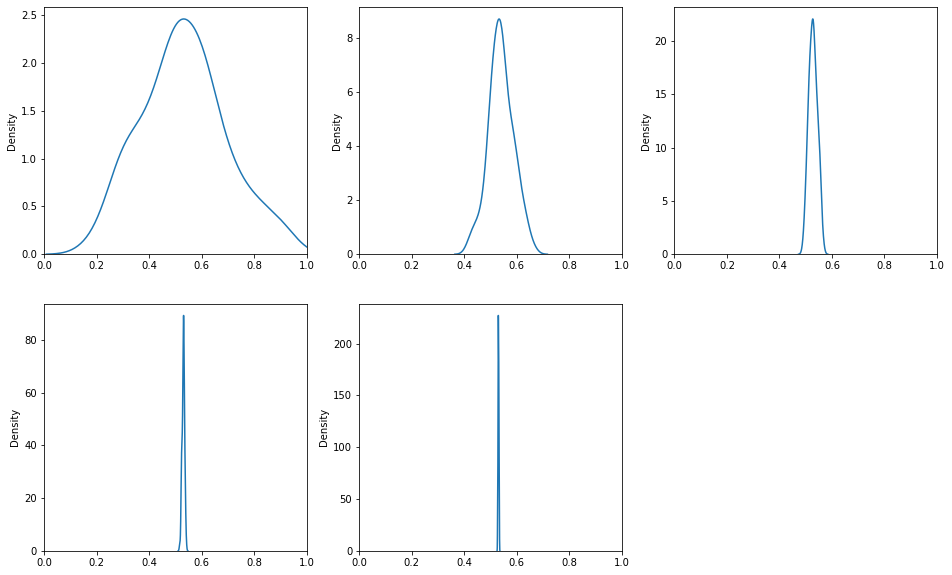

In [141]:
#plotting KDF's:
countHist = 5
nVals = [10,100,1000,10000,100000,1000000]
thinkplot.PrePlot(6,rows=2,cols=3)
samples = 100

for i in range(countHist):
    tmpH7, err7, cdf7, ci7 = getSamples(probp7, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    sns.kdeplot(tmpH7).set(xlim=(0,1))
    print("Error:", err7)
thinkplot.Config()

Error: 0.17406895185529211
Error: 0.052316345438113324
Error: 0.0153957786422123
Error: 0.005310809731105035
Error: 0.0015596733632398806


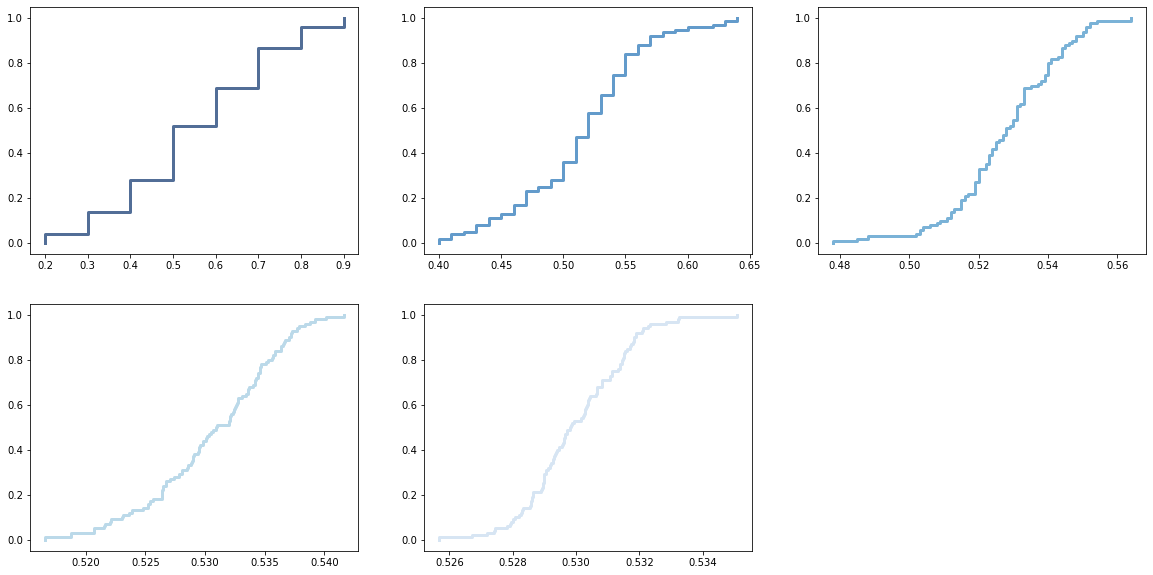

In [142]:
#plotting CDF's
for i in range(countHist):
    tmpH7, err7, cdf7, ci7 = getSamples(probp7, nVals[i], samples)
    thinkplot.SubPlot(i+1)
    thinkplot.Cdf(cdf7)
    print("Error:", err7)
thinkplot.Config()

0.947


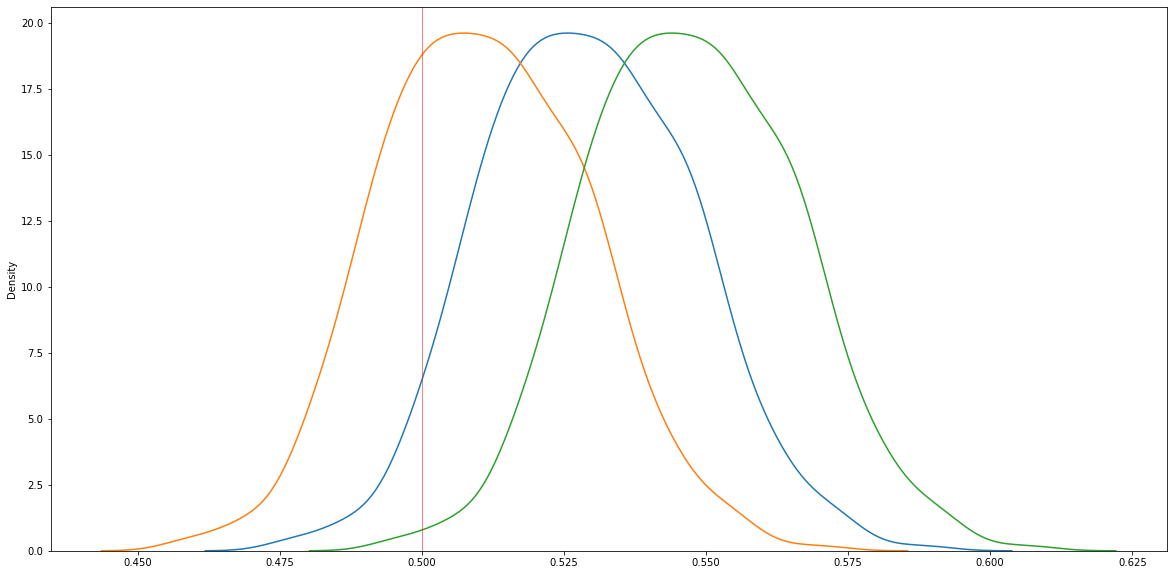

In [143]:
#Run a bunch of trials and count how many purple wins in. 
trials = 1000
means7, err7, cdfFin7, ciFin7 = getSamples(probp7, n=700, samples=trials)
lowest7 = means7 - err7
highest7 = means7 + err7
bWins7 = 0 
for i in range(len(means7)):
    if means7[i] > .5000:
        bWins7 = bWins7 + 1
print(bWins7/trials)

sns.kdeplot(means7)
sns.kdeplot(lowest7)
sns.kdeplot(highest7)
thinkplot.axvline(.5, color="red")

Fraction of Scenarios where purple wins is 94.7% 
We are 95 percent confident that purple will get between 49.6% and 56.6% percent of the vote


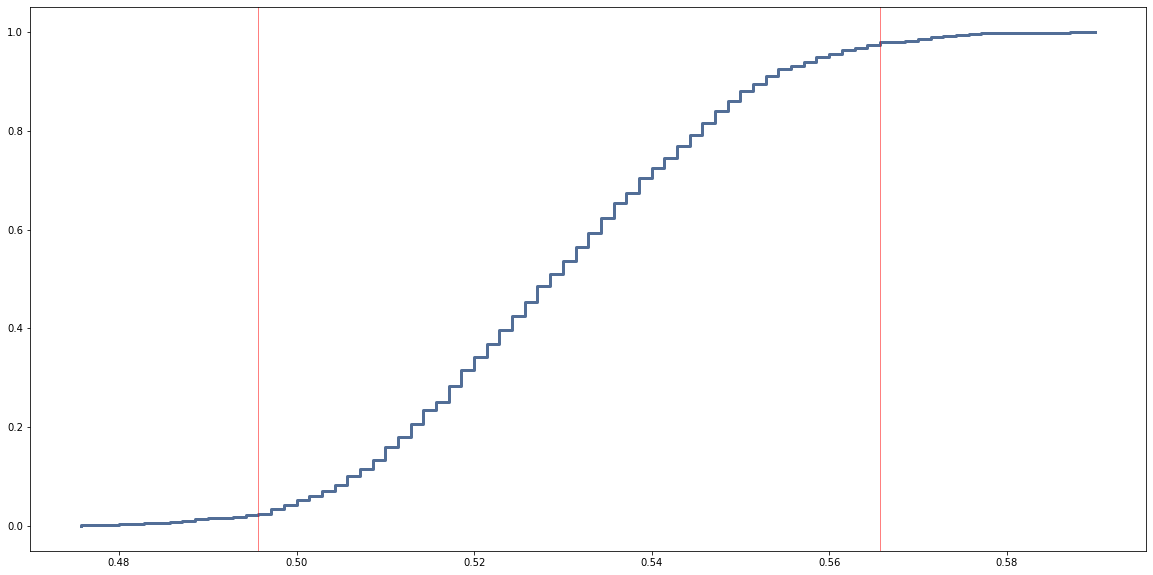

In [144]:
thinkplot.Cdf(cdfFin7)
thinkplot.axvline(ciFin7[0], color="red")
thinkplot.axvline(ciFin7[1], color="red")
print("Fraction of Scenarios where purple wins is %.1f%% " % ((1-cdfFin7.Prob(.50))*100))
print("We are 95 percent confident that purple will get between %.1f%% and %.1f%% percent of the vote" % (ciFin7[0]*100, ciFin7[1]*100))

Prediction- Combining all 9 polls in district 7 purple party is winner.
           

            District-1- Winner Purple Party(1)

            District-2- Purple party is going to lose(0)

            District-3- Winner Purple Party(1)

            District-4- Winner Purple Party(1)

            District-5- Purple party is going to lose(0)

            District-6- Purple party is going to lose(0)

            District-7- Winner Purple Party(1)

            purple party wins 4/7 district, therefore purple party can be predicted as winner


In [69]:
# calucating total yellow party vote share:

past_vote_table["Yellow_vote_expected"]=past_vote_table["voter_turn_percentage"]+past_vote_table["Yellow_improvement"]
past_vote_table

,voter_turn_percentage,Yellow_improvement,year,Yellow_vote_expected
0,0.53,0.012,2013,0.542
1,0.51,0.023,2014,0.533
2,0.48,-0.017,2015,0.463
3,0.55,0.031,2016,0.581
4,0.54,0.030,2017,0.570
5,0.59,-0.004,2018,0.586
6,0.49,-0.030,2019,0.460
7,0.57,0.042,2020,0.612
8,0.56,0.029,2021,0.589


In [70]:
purple_vote=['.458','.467','.537','.419','.43','.414','.54','.398','.411']
Yellow_vote=['.542','.5333','.463','.581','.57','.586','.46','.612','.589']

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [71]:
df = pd.read_csv("players_20_2.csv")
df.head()
df.dropna()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2000,21,17,40,35,27,24,23,21,28,...,16,46,48,28,25,39,41,45,50,52
18274,2000,24,20,42,43,28,32,24,29,39,...,20,42,49,23,25,37,35,42,53,57
18275,1000,32,33,49,53,32,40,32,32,55,...,26,50,45,38,38,36,39,46,52,46
18276,1000,39,34,47,54,28,42,37,39,48,...,28,57,49,31,48,36,40,39,44,54


In [72]:
df.shape

(18278, 30)

In [73]:
#'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing'

In [74]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [75]:
df=df[df["wage_eur"]<100000]
df=df[df["wage_eur"]>20000]
df=df[df["movement_reactions"]>30]
df=df[df["mentality_composure"]>50]
df=df[df["mentality_vision"]>50]
df=df[df["attacking_short_passing"]>60]




In [76]:
df.shape

(1578, 30)

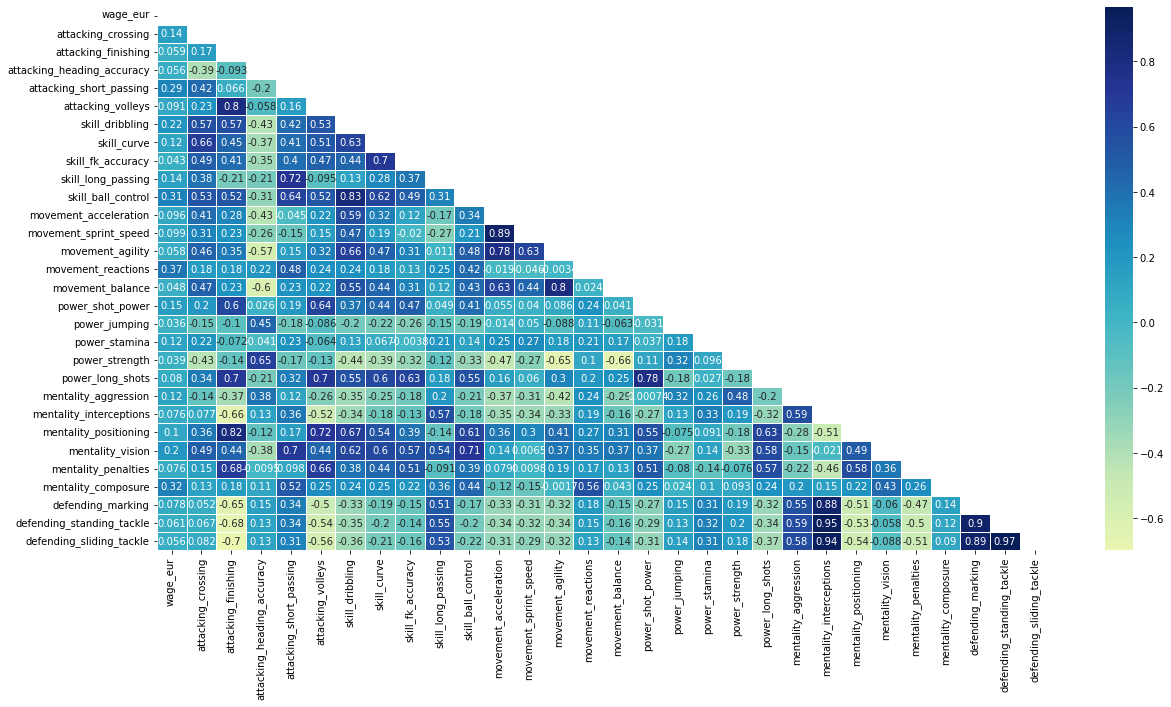

In [77]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

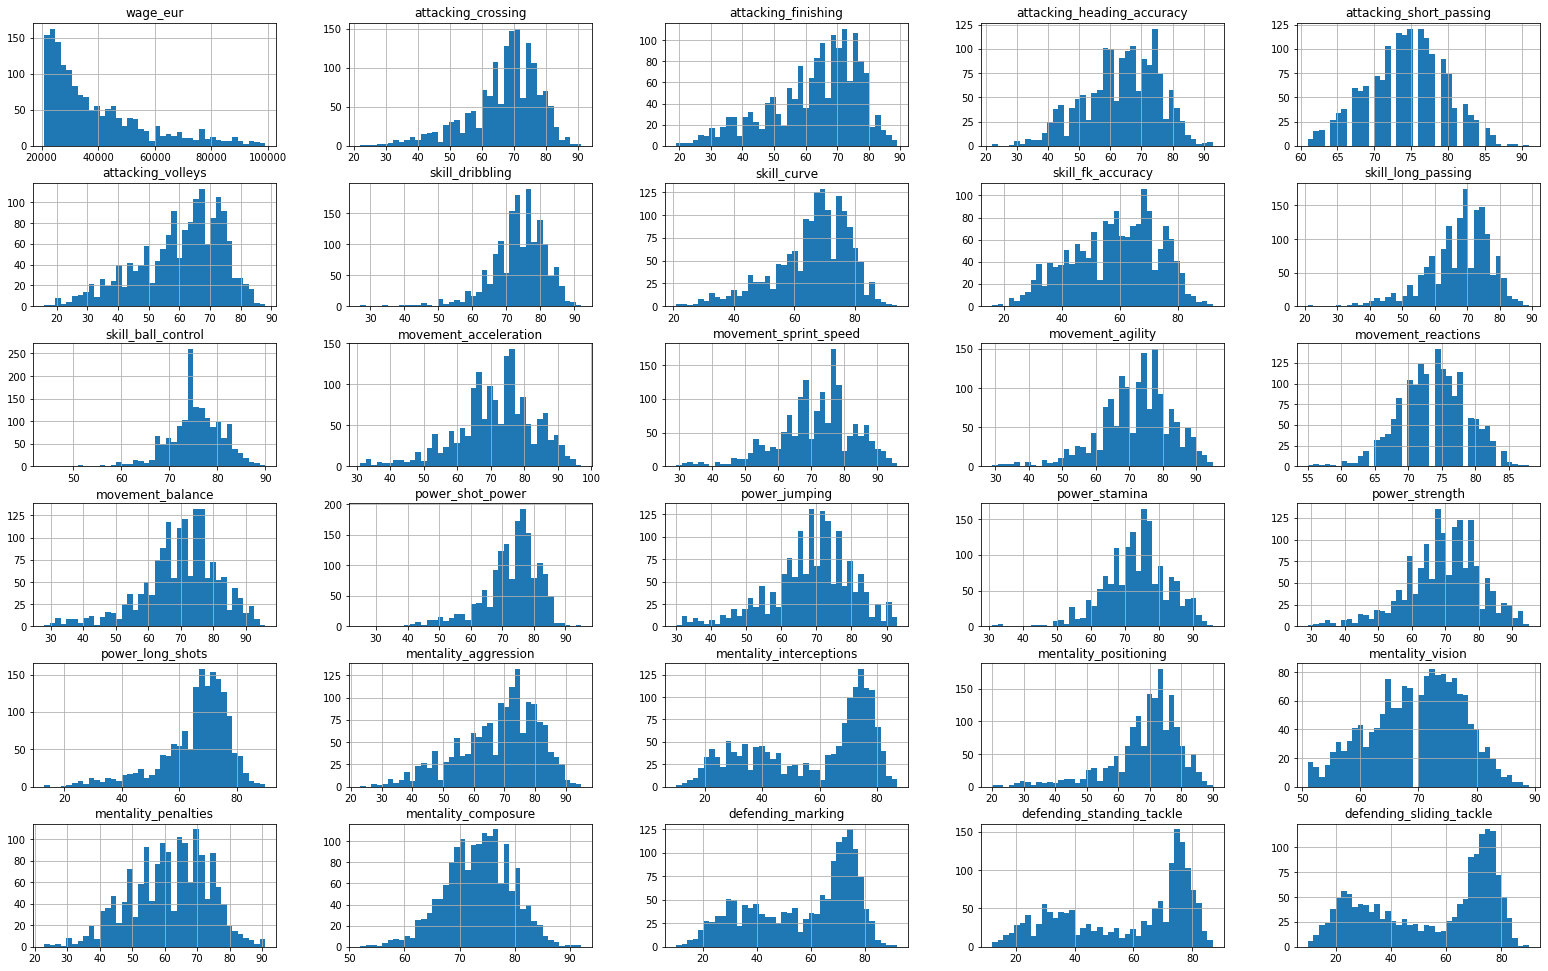

In [78]:
#pollting histogram
df.hist(bins=40, figsize=(27,17))
plt.show()

In [79]:
df.head(1)

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
57,89000,40,42,82,73,40,67,34,30,69,...,30,86,86,30,57,56,81,92,87,83


Values 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' have high 
correlation with the wages therfore  choosing these as x values

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [81]:
# seperate out our x and y values
x_values = df[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing' ]].values
y_values = df['wage_eur'].values

# visual
print(x_values[0], y_values[0])

[83 81 57 73] 89000


In [82]:
x_values

array([[83, 81, 57, 73],
       [78, 85, 86, 91],
       [83, 82, 63, 76],
       ...,
       [56, 57, 61, 63],
       [59, 58, 55, 64],
       [62, 68, 70, 69]], dtype=int64)

In [83]:
degree=2


poly_model = PolynomialFeatures(degree=degree)


poly_x_values = poly_model.fit_transform(x_values)


print(f'initial values {x_values[0]}\nMapped to {poly_x_values[0]}')

initial values [83 81 57 73]
Mapped to [1.000e+00 8.300e+01 8.100e+01 5.700e+01 7.300e+01 6.889e+03 6.723e+03
 4.731e+03 6.059e+03 6.561e+03 4.617e+03 5.913e+03 3.249e+03 4.161e+03
 5.329e+03]


In [84]:
poly_model.fit(poly_x_values, y_values)


regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

y_pred = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(y_values, y_pred, squared=False)

16137.949477897142

In [85]:
y = np.array(df["wage_eur"]).reshape(-1,1)
y.shape

(1578, 1)

In [86]:
#Get a new df with only the features we'll use
df_ = df.drop(columns={"wage_eur"})


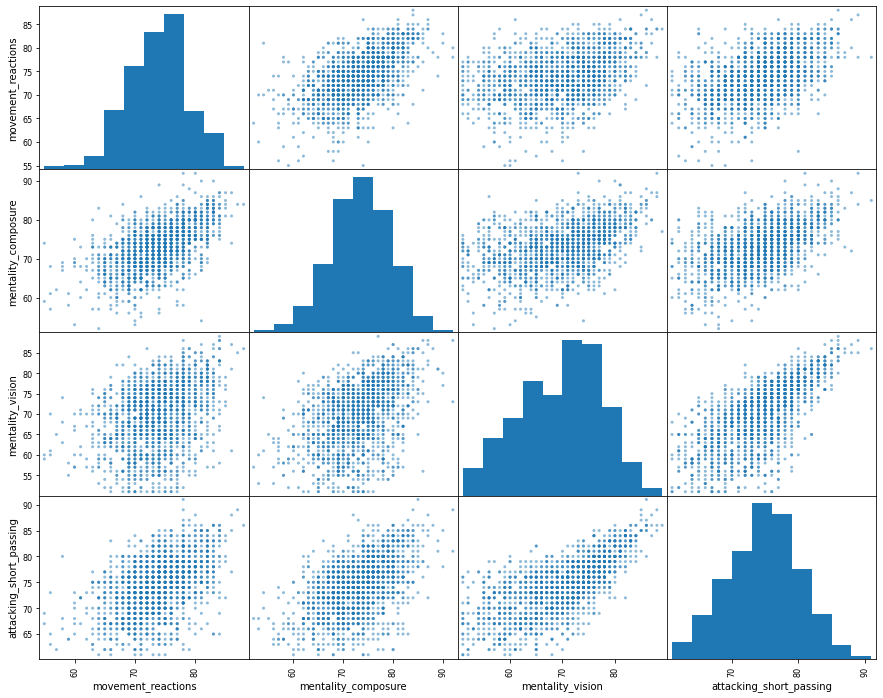

In [87]:
#plotting the scatter plot for Independent variables:
from pandas.plotting import scatter_matrix
attributes = [ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']
scatter_matrix(df_[attributes], figsize=(15,12))
plt.show()

We expected this as all the above are showing high collinearity

In [88]:
df_ = df_[[ 'movement_reactions', 'mentality_composure', 'mentality_vision','attacking_short_passing']]

In [89]:
x = np.array(df_)
x.shape

(1578, 4)

In [90]:
#Split data
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)

In [91]:
#Generate model 
model = LinearRegression().fit(xTrain,yTrain)

In [92]:
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.16477007180796832


In [93]:
print('Intercept:', model.intercept_[0])
print('Coefs:', model.coef_[0])

Intercept: -80282.94309785336
Coefs: [856.69976442 395.95950412 -43.99964612 419.19611817]


In [94]:
#Setup
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split

In [95]:
#Get RMSE
tmp = model.predict(xTest)
R_mse=mean_squared_error(tmp, yTest, squared=False)
r_sqr=model.score(xTest,yTest)
print("RMSE:", R_mse)
print('R-squared:', r_sqr)

RMSE: 15297.592607235085
R-squared: 0.16477007180796832


In [96]:
y_pred=model.predict(xTest)

PREDICTIONS

In [97]:
y_pred[0]

array([27792.31193673])

In [98]:
yTest[0]

array([30000], dtype=int64)

In [99]:

w = "wage_eur"
c = "movement_reactions"
hw = df[['wage_eur', "movement_reactions"]]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

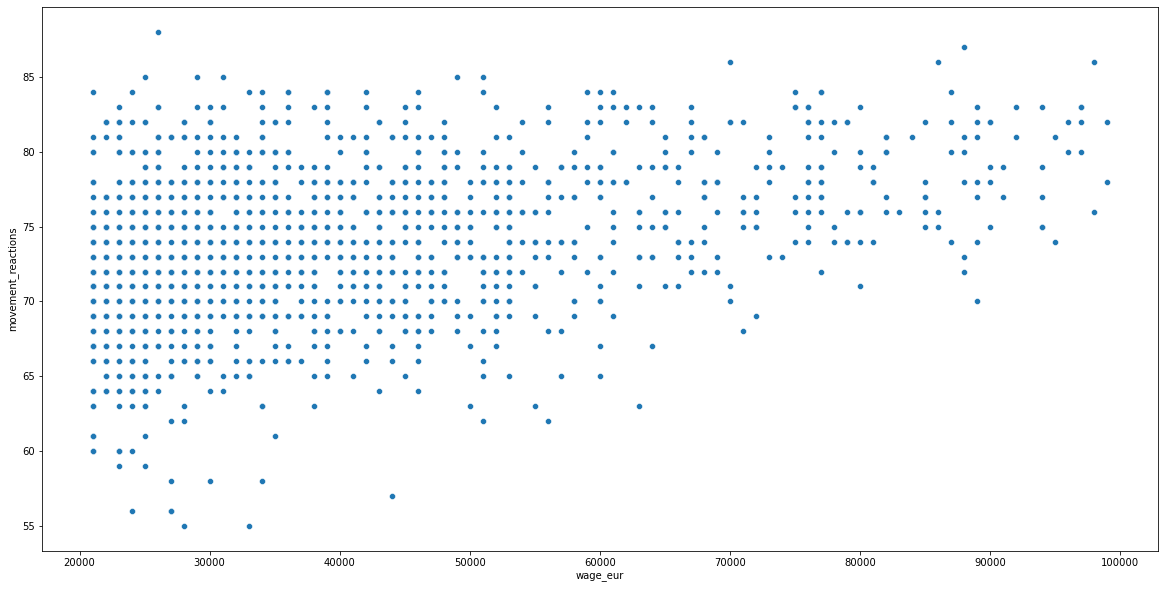

In [100]:
sns.scatterplot(data=hw, x=hw[w], y=hw[c])

In [101]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[w], hw[c]) # Calculate model
res = thinkstats2.Residuals(hw[w], hw[c], inter, slope) # Make residual list. Used later, not needed now. 
regLine = thinkstats2.FitLine(hw[w], inter, slope) # Generate line for plotting. 
print("Y intercept:", inter)
print("Slope:", slope)


Y intercept: 69.63564335064399
Slope: 0.00010454436155874518


In [102]:
print(" Prediction:")
(slope*92)+inter

 Prediction:


69.64526143190739

In [103]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[w]).reshape(-1,1)
y = np.array(hw[c]).reshape(-1,1)
x.shape, y.shape

((1578, 1), (1578, 1))

In [104]:
#generate Model
model = LinearRegression().fit(x, y) 

In [105]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)

print('Coefficient of determination (more on this later):', r_sq)
#Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.13476637767697175
Intercept: 69.63564335064399
Slope: 0.00010454436155874516


<AxesSubplot:xlabel='X', ylabel='Y'>

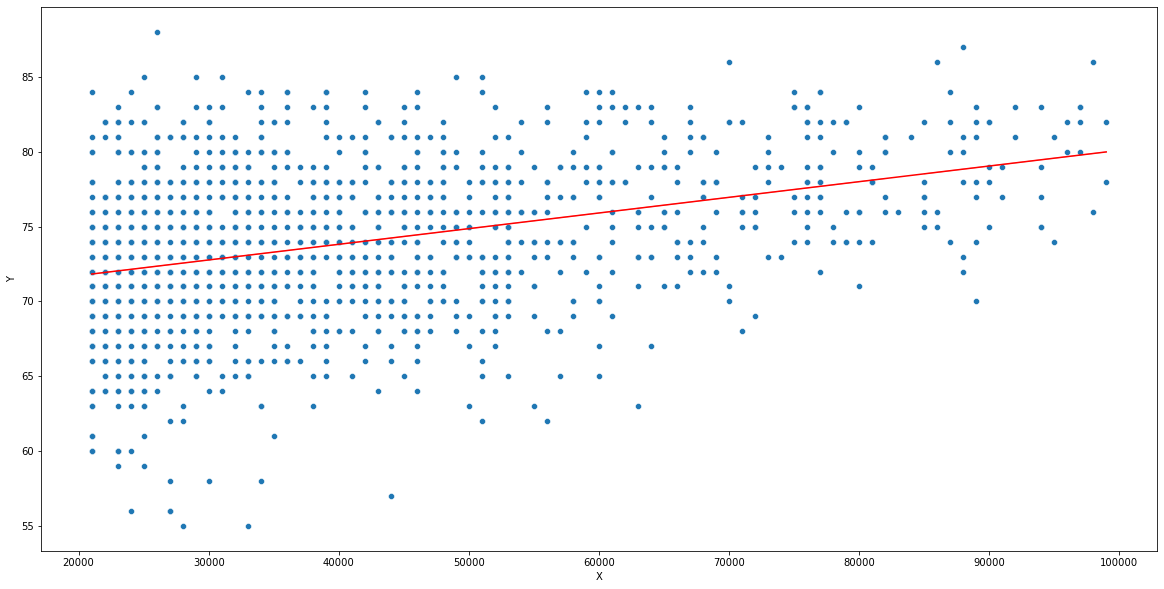

In [106]:
#I'll make a df for ease of use. 
dat = pd.DataFrame(data=np.column_stack((x,y)),columns=['X','Y'])
sns.scatterplot(data=dat, x="X", y="Y")

#Generate the line
inter = model.intercept_[0]
slo = model.coef_[0][0]
inter, slo
lineInf = thinkstats2.FitLine(dat["X"], inter, slo)
sns.lineplot(x=lineInf[0], y=lineInf[1], color="red")

<AxesSubplot:xlabel='X', ylabel='Y'>

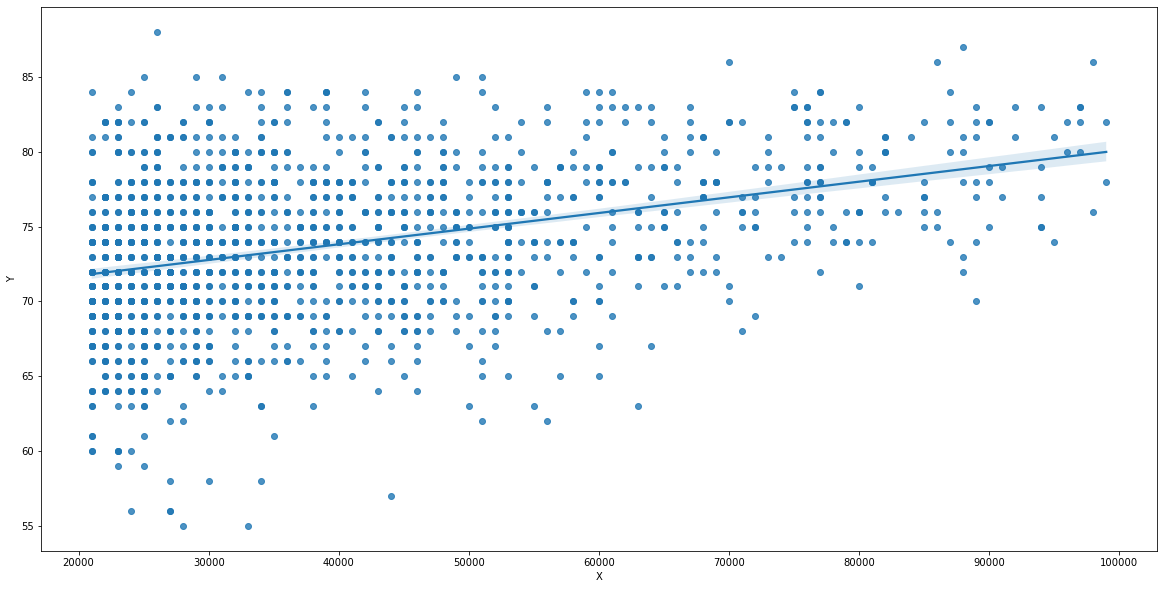

In [107]:
sns.regplot(data=dat, x="X", y="Y")

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

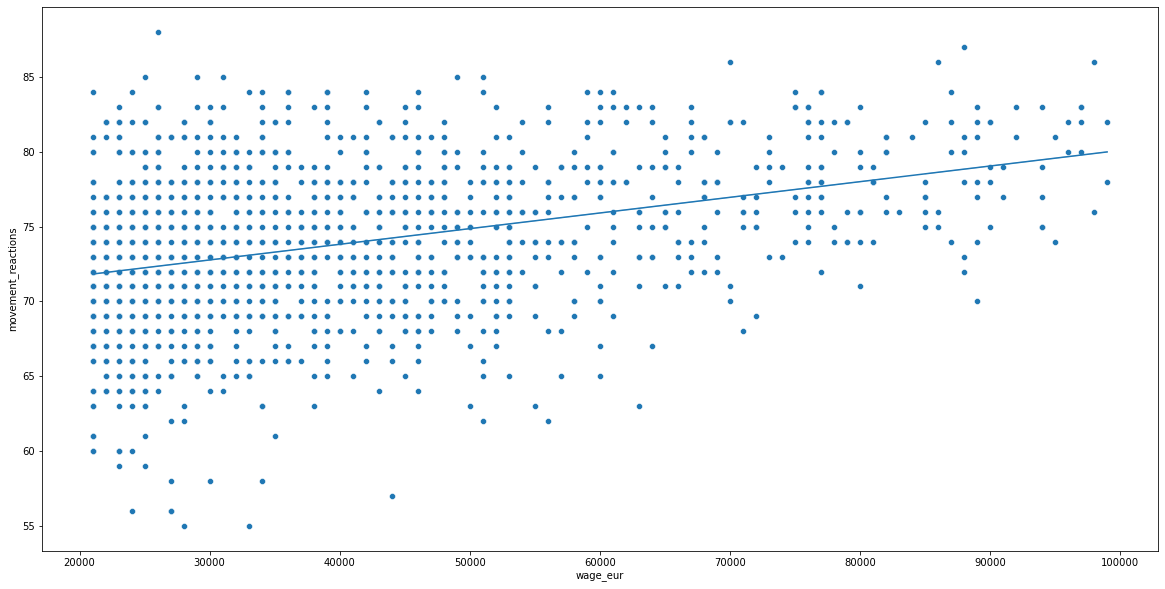

In [108]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[w], y=hw[c])
sns.lineplot(x=regLine[0], y=regLine[1])

In [109]:
print("A skill_curve 93 than the person is expected to be have wages:", slope*93 + inter, "euros")


A skill_curve 93 than the person is expected to be have wages: 69.64536597626895 euros


In [110]:
#Plot residuals directly
#sns.scatterplot(x=hw[w], y=res)
#plt.axhline(0, color="red")

In [111]:
#Seaborn also has a built in residual plot. 
#sns.residplot(x=hw[w], y=hw[c])

In [112]:
# Import library for VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function will check the VIF of each variable in a DF and return the results in another DF
#def calc_vif(X):
    # Calculating VIF
 #   vif = pd.DataFrame()
  #  vif["variables"] = X.columns
   # vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   # return(vif)

In [113]:
#df.head(1)

In [114]:
#df_ = df.drop(columns={"wage_eur"})
#df_.head()

In [115]:
#Check VIFs
#calc_vif(df_)

In [116]:
#new_df.corr()

In [117]:
#calc_vif(new_df)

In [118]:
A = df.iloc[:, 1:2].values.reshape(-1,1)
B = df.iloc[:, 2].values.reshape(-1,1)

In [119]:
from sklearn.model_selection import train_test_split 
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [120]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(A, B)

LinearRegression()

In [121]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
A_poly = poly_reg.fit_transform(A)
pol_reg = LinearRegression()
pol_reg.fit(A_poly, B)

LinearRegression()

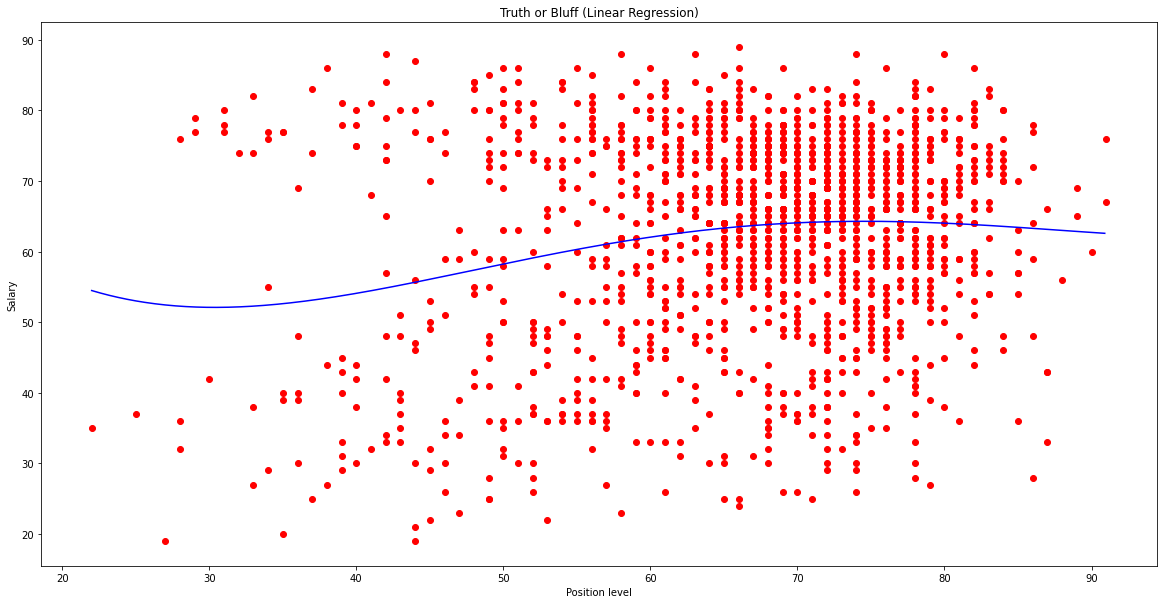

In [122]:
def viz_polymonial_smooth():
    A_grid = np.arange(min(A), max(A), 0.1)
    A_grid = A_grid.reshape(len(A_grid), 1) #reshape
    # Visualizing the Polymonial Regression results
    plt.scatter(A, B, color='red')
    plt.plot(A_grid, pol_reg.predict(poly_reg.fit_transform(A_grid)), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial_smooth()